
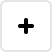
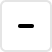
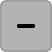
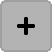
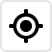
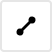
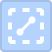
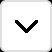
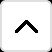
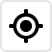
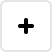
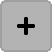
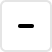
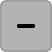
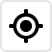
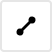
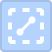
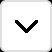
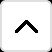
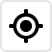

In [3]:
from lets_plot import *

import numpy as np
import pandas as pd

LetsPlot.setup_html() 

In [2]:
mtcars = pd.read_csv("https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv")

In [3]:
dat = mtcars[mtcars['wt'] > 2.75]
dat = dat[dat['wt'] < 3.45]

In [4]:
plot = ggplot(dat, aes('wt', 'mpg', label = 'model')) + geom_point(color = "red")
gggrid([
    plot + geom_text() + ggtitle('geom_text()'), 
    plot + geom_text_repel() + ggtitle('geom_text_repel()'),
])

### Hide some of the labels
Set labels to the empty string "" to hide them. All data points repel the non-empty labels.

In [5]:
dat2 = mtcars[(mtcars['wt'] > 3) & (mtcars['wt'] < 4)].copy()

# Скрыть все подписи
dat2['car'] = ""

# Проставить подписи только по индексам
ix_label = [1, 2, 13]
dat2.loc[dat2.index[ix_label], 'car'] = dat2.loc[dat2.index[ix_label], 'model']
dat2['color'] = np.where(dat2['car'] == "", "grey", "red")

In [6]:
ggplot(dat2, aes('wt', 'mpg', label = 'car')) + geom_text_repel(seed=6) + geom_point(aes(color = 'color')) + scale_color_identity()

We can quickly repel a few text labels from 4,000 data points in the example below.

We use max.overlaps = Inf to ensure that no text labels are discarded, even if a text label overlaps lots of other things (e.g. other text labels or other data points).

In [7]:
dat3_noise = pd.DataFrame({
    'wt': np.random.normal(loc=3, scale=1, size=4000),
    'mpg': np.random.normal(loc=19, scale=1, size=4000),
    'car': ""
})
dat3 = pd.concat([dat3_noise, dat2[dat2['car'] != '']], ignore_index=True)
red3 = dat3[dat3['car'] != '']
red3

wt   mpg                car              model  cyl   disp     hp  \
4000  3.440  18.7  Hornet Sportabout  Hornet Sportabout  8.0  360.0  175.0   
4001  3.460  18.1            Valiant            Valiant  6.0  225.0  105.0   
4002  3.845  19.2   Pontiac Firebird   Pontiac Firebird  8.0  400.0  175.0   

      drat   qsec   vs   am  gear  carb color  
4000  3.15  17.02  0.0  0.0   3.0   2.0   red  
4001  2.76  20.22  1.0  0.0   3.0   1.0   red  
4002  3.08  17.05  0.0  0.0   3.0   2.0   red

In [8]:
ggplot() + \
    geom_point(aes('wt', 'mpg'), data = dat3, color = 'grey') + \
    geom_text_repel(aes('wt', 'mpg', label='car'), data = dat3, max_time=-1, max_overlaps = -1) + \
    geom_point(aes('wt', 'mpg'), data = red3, color = 'red')

### Always show all labels, even when they have too many overlaps
Some text labels will be discarded if they overlap too many other things (default limit is 10). So, if a text label overlaps 10 other text labels or data points, then it will be discarded.

We can expect to see a warning if some data points could not be labeled due to too many overlaps.

Set max.overlaps = Inf to override this behavior and always show all labels, regardless of whether or not a text label overlaps too many other things.

Use options(ggrepel.max.overlaps = Inf) to set this globally for your entire session. The global option can be overridden by providing the max.overlaps argument to geom_text_repel().

In [9]:
n = 15
dat4 = pd.DataFrame({
    'x': [1] * n,
    'y': [1] * n,
    'label': list('abcdefghijklmno')  # 15 букв
})

In [10]:
plot = ggplot(dat4, aes('x', 'y', label='label')) + geom_point()

gggrid([
    plot + geom_text_repel(box_padding=20, max_overlaps=10) + ggtitle("max_overlaps = 10 (default)"), 
    plot + geom_text_repel(box_padding=20, max_overlaps=-1) + ggtitle("max_overlaps = -1"),
])

### Do not repel labels from data points
Set point.size = 0.0 to prevent label repulsion away from data points.

Labels will still move away from each other and away from the edges of the plot.

In [11]:
ggplot(dat, aes('wt', 'mpg', label = 'model')) + \
  geom_point(color = "red") + \
  geom_text_repel(point_size = 0.0)

### Do not repel labels from plot (panel) edges
Set xlim or ylim to Inf or -Inf to disable repulsion away from the edges of the panel. Use NA to indicate the edge of the panel.

In [12]:
# ggplot(dat, aes('wt', 'mpg', label = 'model')) +
#   geom_point(color = "red") +
#   geom_text_repel(
#     # Repel away from the left edge, not from the right.
#     xlim = c(NA, Inf),
#     # Do not repel from top or bottom edges.
#     ylim = c(-Inf, Inf)
#   )

We can also disable clipping to allow the labels to go beyond the edges of the panel.

In [13]:
# ggplot(dat, aes(wt, mpg, label = car)) +
#   geom_point(color = "red") +
#   coord_cartesian(clip = "off") +
#   geom_label_repel(fill = "white", xlim = c(-Inf, Inf), ylim = c(-Inf, Inf))

### Repel labels from data points with different sizes
We can use the continuous_scale() function from ggplot2. It allows us to specify a single scale that applies to multiple aesthetics.

For ggrepel, we want to apply a single size scale to two aesthetics:

size, which tells ggplot2 the size of the points to draw on the plot
point.size, which tells ggrepel the point size, so it can position the text labels away from them
In the example below, there is a third size in the call to geom_text_repel() to specify the font size for the text labels.

In [14]:
ggplot(dat, aes('wt', 'mpg', label='model')) + \
    geom_point(aes(size='cyl'), alpha=0.6) + \
    geom_text_repel(
        aes(point_size='cyl'),
        size=5,
        box_padding=0.3,
        max_iterations=2000,
        min_segment_length=0.0
    )

In [15]:
ggplot(mtcars) + geom_point(aes(x='wt', label = 'model'), y = 1, color='red') + xlim(1, 6) + ylim(1, 1.3) + \
    geom_text_repel(
        aes(x='wt', label = 'model'), 
        y = 1, 
        nudge_y = 0.05, 
        direction = 'x', 
        box_padding = 1,
        angle = 90,
        hjust = 0.0,
        seed = 2
    ) 

In [16]:
ggplot(mtcars, aes('wt', 'mpg', label = 'model', color='wt')) + geom_point() + geom_text_repel(max_time=-1) + flavor_darcula()

In [18]:
ggplot(dat, aes('wt', 'mpg', label='model')) + \
    geom_point(size=0.1, size_unit='x', alpha=0.6) + \
    geom_text_repel(
        point_size = 0.1,
        size_unit='x',
        size=0.05,
        box_padding=0.3,
        max_iterations=2000,
        min_segment_length=0.0
    )

In [12]:
x = [0, 1]
y = [1, -1]
shape = [16, 21]
size = [10, 20]
stroke = [1, 0]
label = ['one', 'two']
data = {
    'x': x,
    'y': y,
    'shape': shape,
    'size': size,
    'stroke': stroke,
    'label': label
}

In [15]:
ggplot(data, aes('x', 'y', label='label' )) + scale_shape_identity() + xlim(-2, 3) + ylim(-8,8) \
    + scale_size(range=[10,20], guide='none') \
    + scale_stroke(range=[5,10], guide='none') \
    + geom_point(aes(size='size', stroke='stroke', shape='shape'), color = 'red') \
    + geom_text_repel(aes(point_size='size', point_stroke='stroke', shape='shape'))